In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

In [24]:
data = pd.read_csv('spotify_songs.csv')
data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [25]:
data.rename(columns={'track_popularity': 'popularity', 
                     'track_artist': 'artist', 
                     'track_name': 'name', 
                     'track_album_id': 'album_id', 
                     'track_album_name': 'album_name', 
                     'track_album_release_date': 'album_release_date', 
                     'playlist_genre': 'genre', 
                     'playlist_subgenre': 'subgenre'}, inplace=True)

In [26]:
# Güncellenmiş veriyi kaydet
data.to_csv('processed_data.csv', index=False)
print("Veri kaydedildi!")

Veri kaydedildi!


In [4]:
print("Columns: ", data.columns)
print("Shape: ", data.shape)
print("Info: ", data.info())
print("Unique Playlist Name Number: ", len(data['playlist_name'].unique()))
print("Description: ", data.describe().T)

Columns:  Index(['track_id', 'name', 'artist', 'popularity', 'album_id', 'album_name',
       'album_release_date', 'playlist_name', 'playlist_id', 'genre',
       'subgenre', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms'],
      dtype='object')
Shape:  (32833, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            32833 non-null  object 
 1   name                32828 non-null  object 
 2   artist              32828 non-null  object 
 3   popularity          32833 non-null  int64  
 4   album_id            32833 non-null  object 
 5   album_name          32828 non-null  object 
 6   album_release_date  32833 non-null  object 
 7   playlist_name       32833 non-null  object 
 8   playlist_id 

In [5]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(data, title="Spotify Data Report", explorative=True)
# profile.to_notebook_iframe()
# profile.to_file("spotify_eda_report.html")

In [6]:
numeric_cols = ['popularity', 'danceability', 'energy', 'key','valence', 'tempo', 'loudness',
                'acousticness', 'instrumentalness', 'speechiness', 'liveness', 'duration_ms']

In [7]:
cols_including_null = data.columns[data.isnull().sum() != 0]
cols_including_null

Index(['name', 'artist', 'album_name'], dtype='object')

In [8]:
rows_with_null = data[data.isnull().any(axis=1)]
rows_with_null

,track_id,name,artist,popularity,album_id,album_name,album_release_date,playlist_name,playlist_id,genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,...,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773
19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707


In [10]:
same_within_album_name = data[data['name'] == data['album_name']]
avg = same_within_album_name['popularity'].mean()
print(f'Average popularity of songs with the same name as their album: {avg}')

Average popularity of songs with the same name as their album: 45.53182788051209


In [54]:
data['key'].unique()

array([ 6, 11,  1,  7,  8,  5,  4,  2,  0, 10,  9,  3])

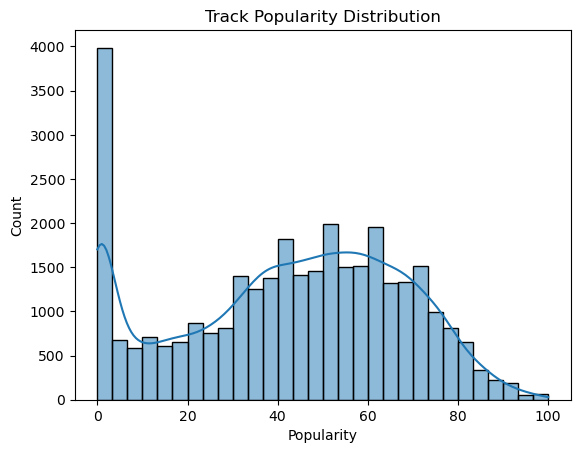

In [11]:
sns.histplot(data['popularity'], bins=30, kde=True)
plt.title("Track Popularity Distribution")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

Genre number:  6


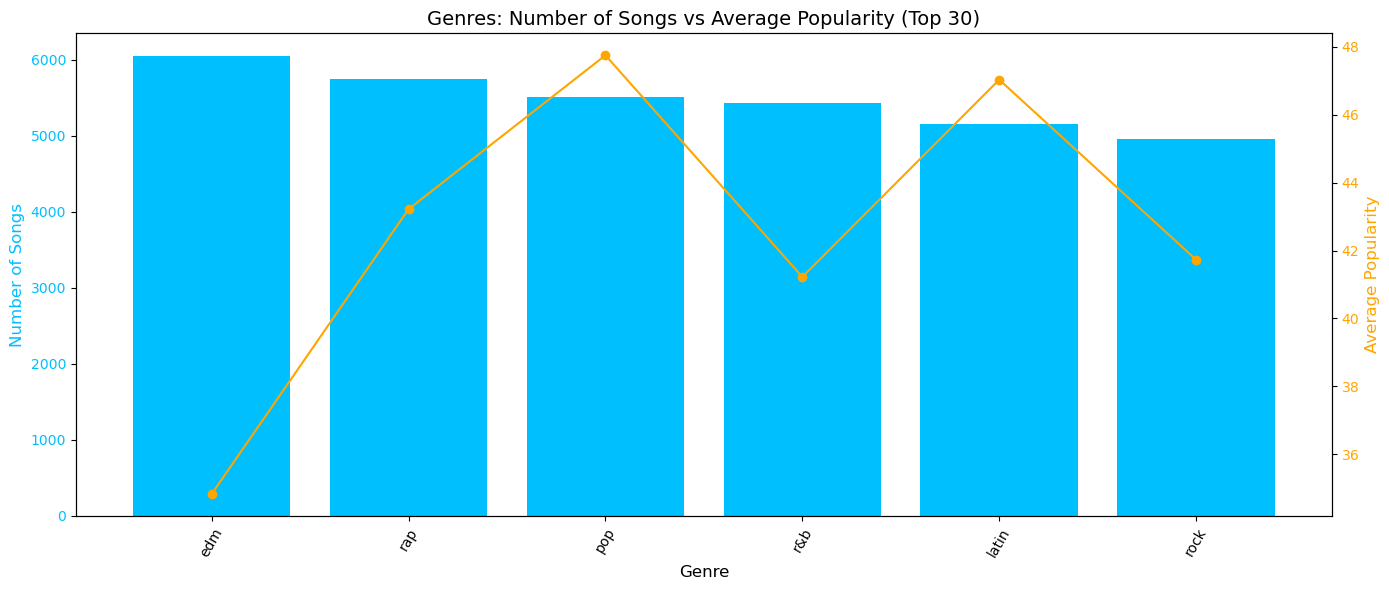

In [53]:
# Her genre'ın şarkı sayısını ve ortalama popülerliğini hesapla
genre_counts = data['genre'].value_counts()
genre_popularity = data.groupby('genre')['popularity'].mean().loc[genre_counts.index]
print("Genre number: ", len(data['genre'].unique()))
# Veriyi birleştir
genre_stats = pd.DataFrame({
    'Song Count': genre_counts,
    'Average Popularity': genre_popularity
})

# En çok şarkıya sahip 30 genre'ı göster
top_genres = genre_stats.head(30)

# Grafik oluşturma
fig, ax1 = plt.subplots(figsize=(14, 6))

# Bar grafiği: şarkı sayısı
ax1.bar(top_genres.index, top_genres['Song Count'], color='deepskyblue', label='Song Count')
ax1.set_xlabel('Genre', fontsize=12)
ax1.set_ylabel('Number of Songs', color='deepskyblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='deepskyblue')
ax1.tick_params(axis='x', rotation=60)

# Çizgi grafiği: ortalama popülerlik
ax2 = ax1.twinx()
ax2.plot(top_genres.index, top_genres['Average Popularity'], color='orange', marker='o', label='Avg Popularity')
ax2.set_ylabel('Average Popularity', color='orange', fontsize=12)
ax2.tick_params(axis='y', labelcolor='orange')

# Başlık ve legend
plt.title('Genres: Number of Songs vs Average Popularity (Top 30)', fontsize=14)
fig.tight_layout()
plt.show()

24


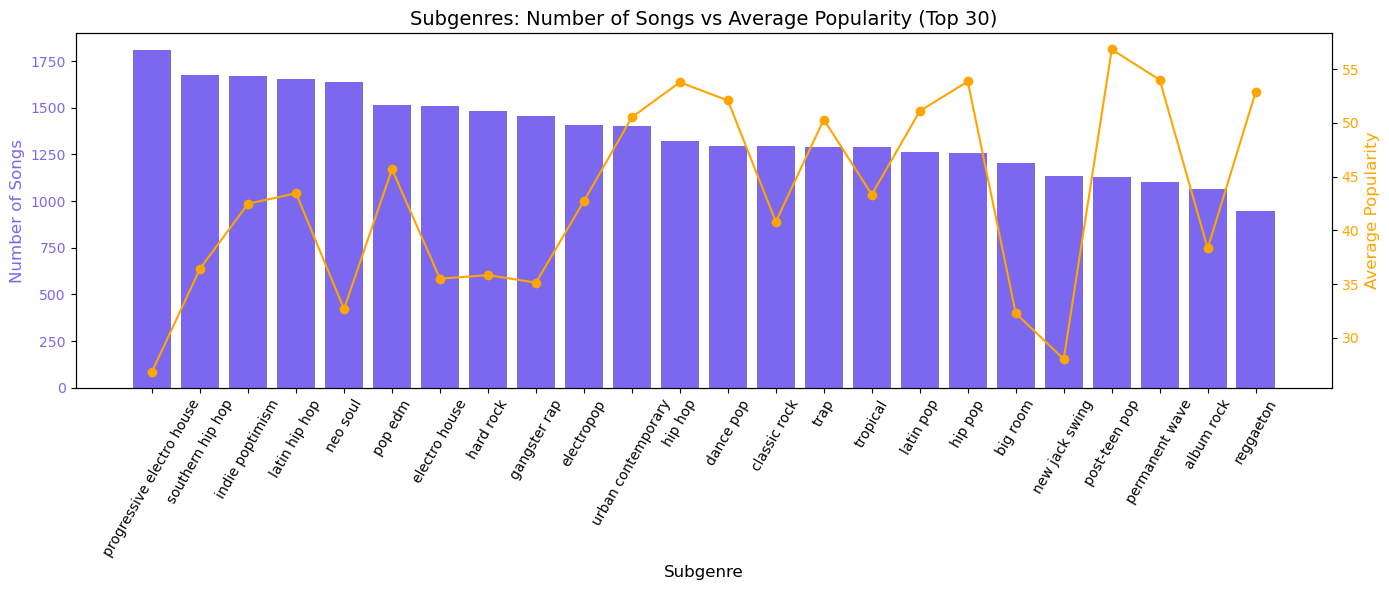

In [ ]:
# Her subgenre’ın şarkı sayısını ve ortalama popülerliğini hesapla
subgenre_counts = data['subgenre'].value_counts()
print("Total subgenre num: ", len(data['subgenre'].unique()))
subgenre_popularity = data.groupby('subgenre')['popularity'].mean().loc[subgenre_counts.index]

# Veriyi tek DataFrame’de birleştir
subgenre_stats = pd.DataFrame({
    'Song Count': subgenre_counts,
    'Average Popularity': subgenre_popularity
})

# En çok şarkıya sahip 30 subgenre'ı göster
top_subgenres = subgenre_stats

# Grafik oluşturma
fig, ax1 = plt.subplots(figsize=(14, 6))

# Bar grafiği: şarkı sayısı
ax1.bar(top_subgenres.index, top_subgenres['Song Count'], color='mediumslateblue', label='Song Count')
ax1.set_xlabel('Subgenre', fontsize=12)
ax1.set_ylabel('Number of Songs', color='mediumslateblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='mediumslateblue')
ax1.tick_params(axis='x', rotation=60)

# Çizgi grafiği: ortalama popülerlik
ax2 = ax1.twinx()
ax2.plot(top_subgenres.index, top_subgenres['Average Popularity'], color='orange', marker='o', label='Avg Popularity')
ax2.set_ylabel('Average Popularity', color='orange', fontsize=12)
ax2.tick_params(axis='y', labelcolor='orange')

# Başlık ve legend
plt.title('Subgenres: Number of Songs vs Average Popularity (Top 30)', fontsize=14)
fig.tight_layout()
plt.show()

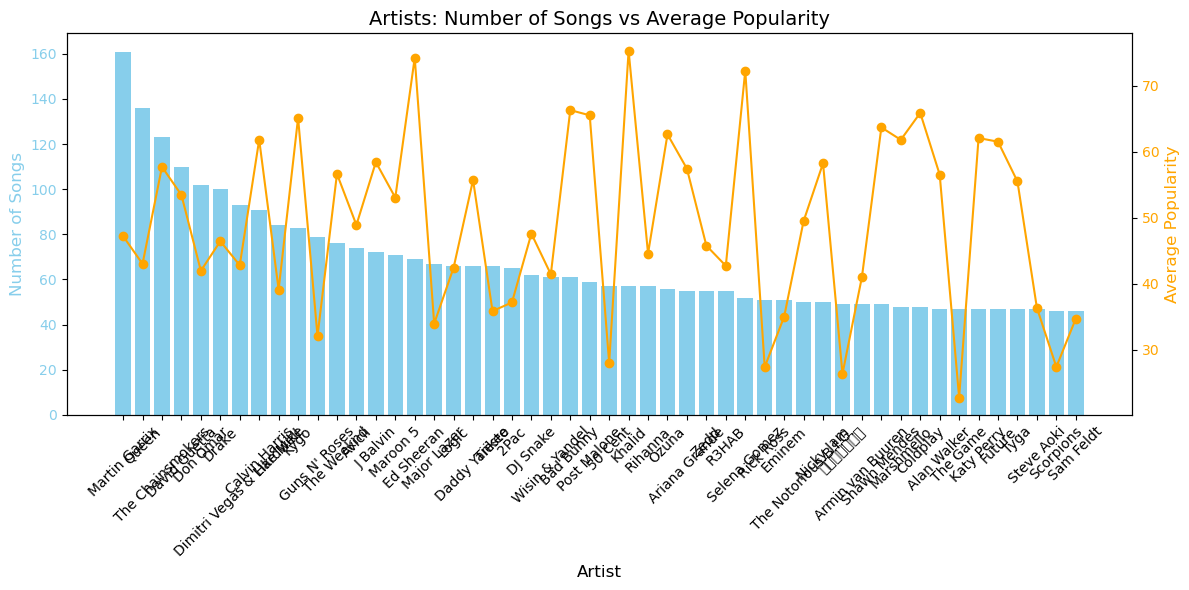

In [14]:
artist_counts = data['artist'].value_counts()
artist_popularity = data.groupby('artist')['popularity'].mean().loc[artist_counts.index]

# Veriyi tek bir DataFrame’de birleştirelim
artist_stats = pd.DataFrame({
    'Song Count': artist_counts,
    'Average Popularity': artist_popularity
})

# (Opsiyonel) en popüler ilk 10 sanatçıyı göster
top_artists = artist_stats.head(50)

# Grafik oluşturma
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar grafiği: şarkı sayısı
ax1.bar(top_artists.index, top_artists['Song Count'], color='skyblue', label='Song Count')
ax1.set_xlabel('Artist', fontsize=12)
ax1.set_ylabel('Number of Songs', color='skyblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.tick_params(axis='x', rotation=45)

# İkinci eksen: ortalama popülerlik
ax2 = ax1.twinx()
ax2.plot(top_artists.index, top_artists['Average Popularity'], color='orange', marker='o', label='Avg Popularity')
ax2.set_ylabel('Average Popularity', color='orange', fontsize=12)
ax2.tick_params(axis='y', labelcolor='orange')

# Başlık ve legend
plt.title('Artists: Number of Songs vs Average Popularity', fontsize=14)
fig.tight_layout()

plt.show()

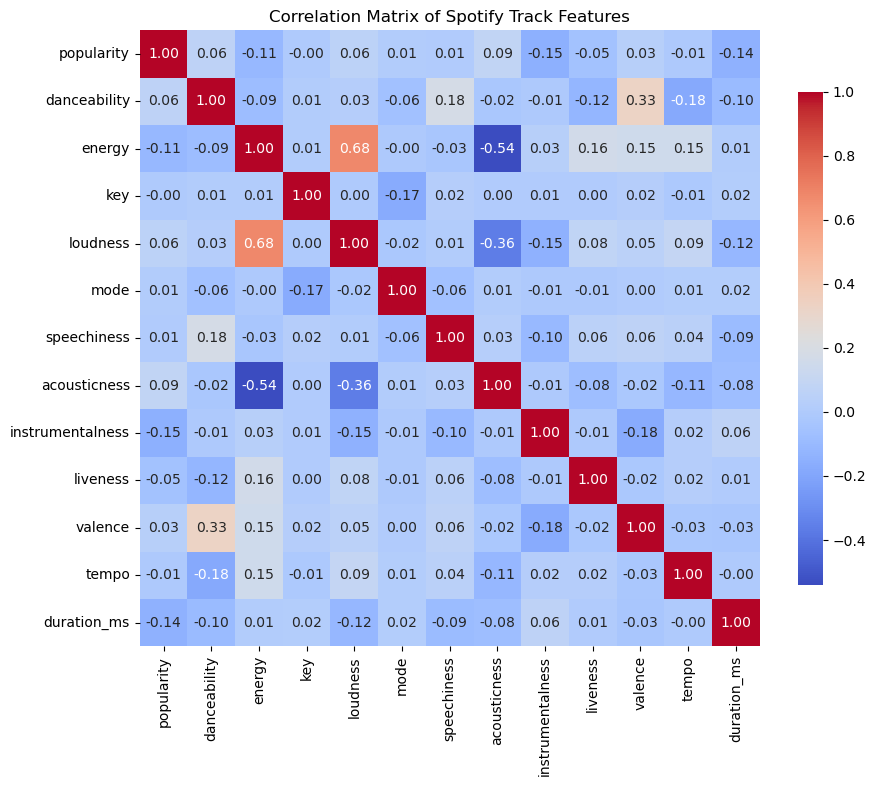

In [15]:
corr_table_data = data.drop(columns=['track_id', 'name', 'artist', 'album_name', 'album_id', 'genre', 'subgenre', 'playlist_id', 'playlist_name', 'album_release_date'])
corr_table = corr_table_data.corr()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(corr_table, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Spotify Track Features')
plt.show()

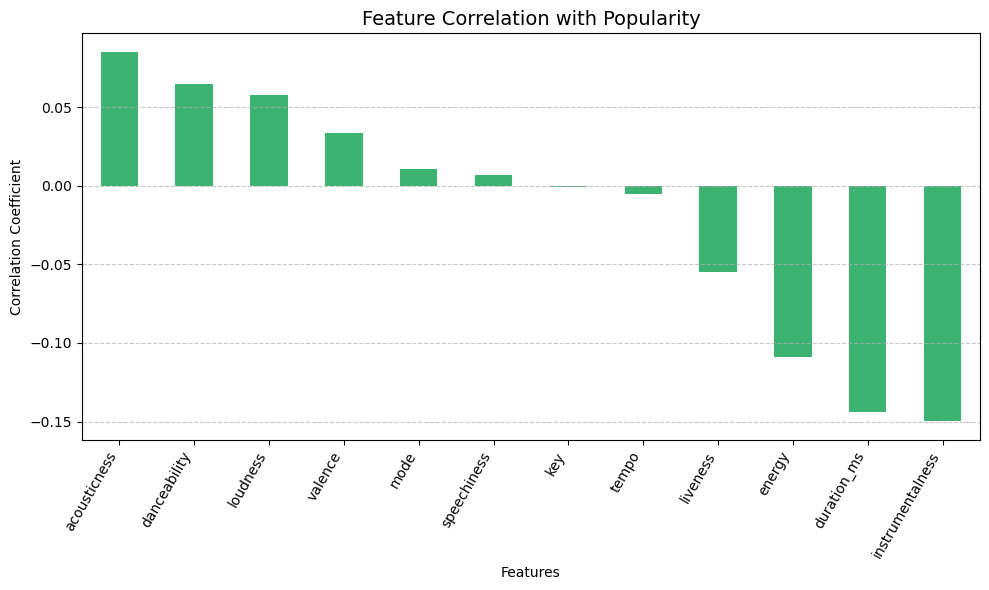

In [16]:
sorted_corr = corr_table['popularity'].sort_values(ascending=False)
sorted_corr =sorted_corr.drop('popularity', errors='ignore')
# Korelasyonları görselleştirme
plt.figure(figsize=(10, 6))
sorted_corr.plot(kind='bar', color='mediumseagreen')

plt.title('Feature Correlation with Popularity', fontsize=14)
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=60, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

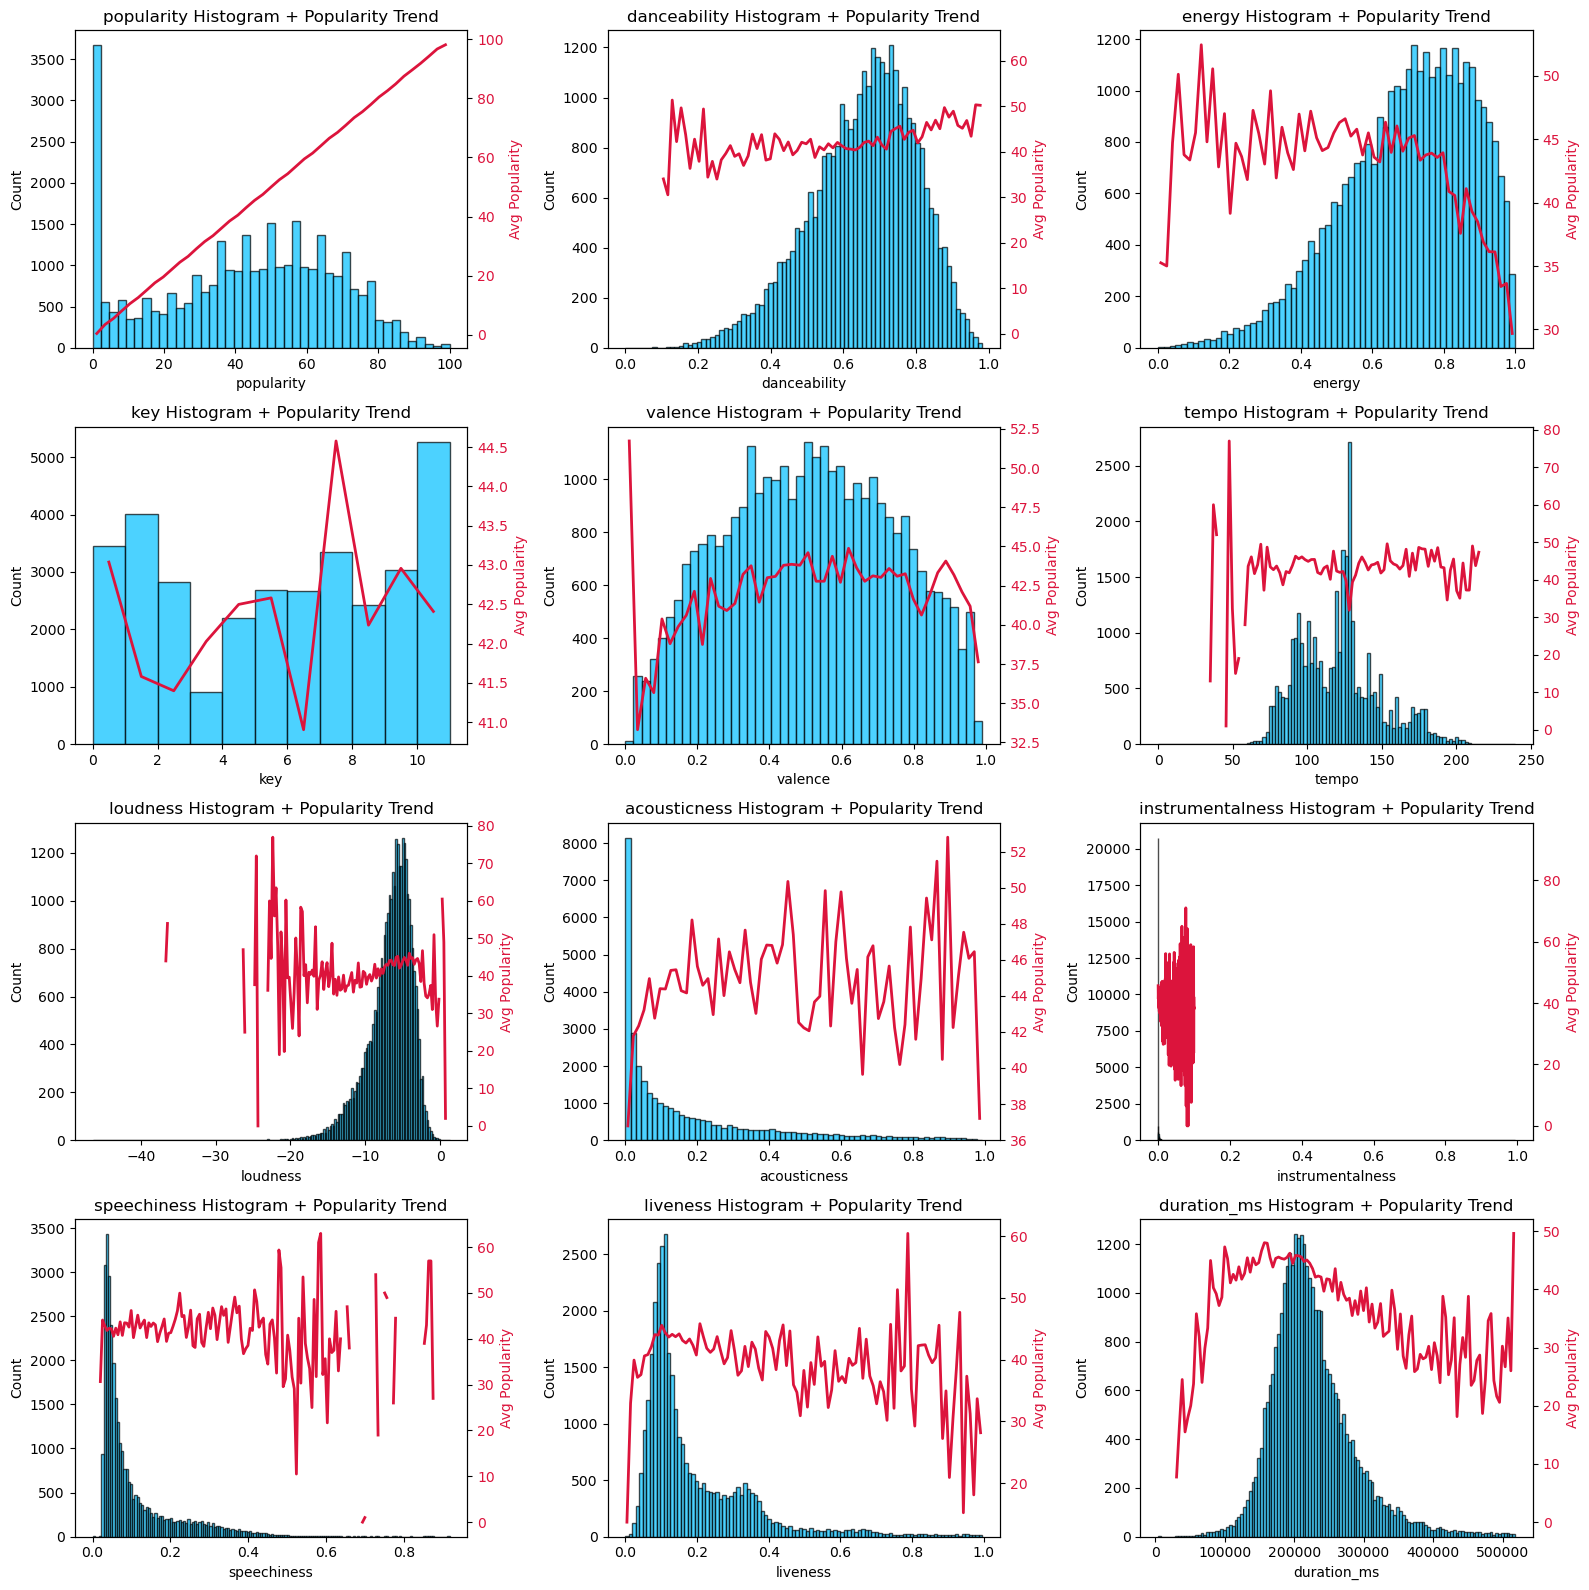

In [17]:
# Satır–sütun sayısını otomatik belirle
n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    # Histogram (önce otomatik bin aralıklarını al)
    counts, bins, patches = axes[i].hist(data[col], bins='auto', color='deepskyblue', edgecolor='black', alpha=0.7)
    
    # Popularity ortalamaları (bin aralıklarına göre)
    bin_labels = pd.cut(data[col], bins=bins, include_lowest=True)
    grouped = data.groupby(bin_labels)['popularity'].mean()
    centers = [interval.mid for interval in grouped.index]
    bin_means = grouped.values

    # Popularity çizgisi
    ax2 = axes[i].twinx()
    ax2.plot(centers, bin_means, color='crimson', linewidth=2)
    ax2.set_ylabel('Avg Popularity', color='crimson')
    ax2.tick_params(axis='y', labelcolor='crimson')

    axes[i].set_title(f'{col} Histogram + Popularity Trend')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Boş kalan hücreleri gizle
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

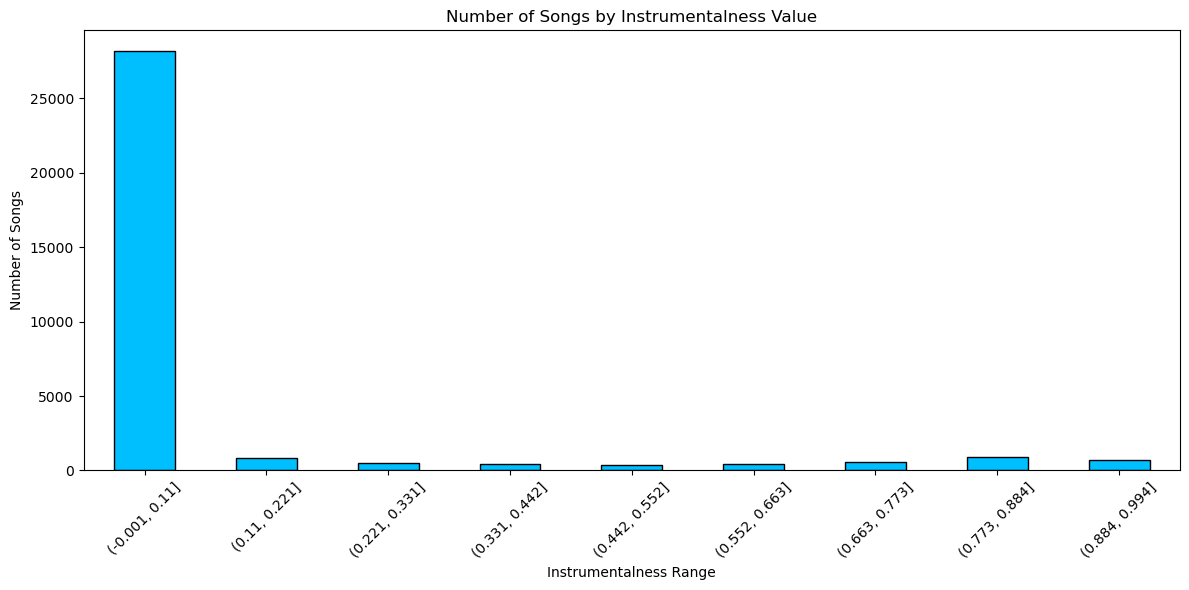

In [18]:
bins = np.linspace(data['instrumentalness'].min(), data['instrumentalness'].max(), 10)
bin_labels = pd.cut(data['instrumentalness'], bins=bins, include_lowest=True)
counts = data.groupby(bin_labels).size()

plt.figure(figsize=(12, 6))
counts.plot(kind='bar', color='deepskyblue', edgecolor='black')
plt.xlabel('Instrumentalness Range')
plt.ylabel('Number of Songs')
plt.title('Number of Songs by Instrumentalness Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

count:  25836


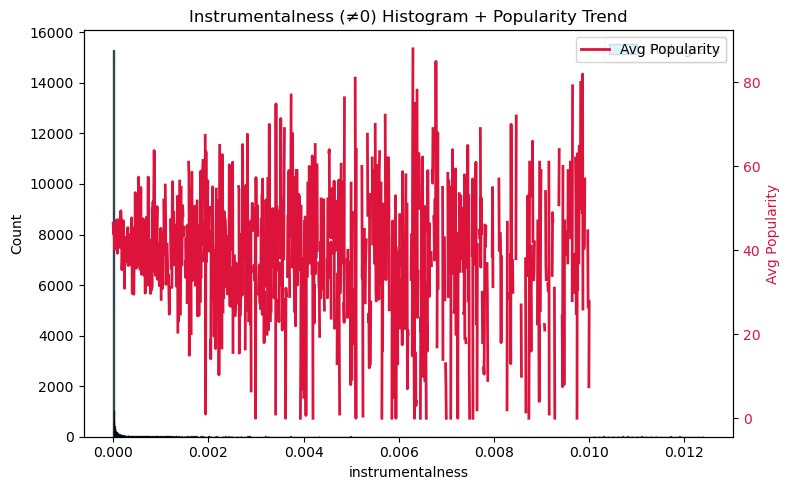

In [19]:
fig, ax = plt.subplots(figsize=(8, 5))

# Sadece 0 olmayanları al
filtered = data[data['instrumentalness']  < 0.0125]
print("count: ", len(filtered))

# Histogram (otomatik bin aralıkları)
counts, bins, patches = ax.hist(filtered['instrumentalness'], bins='auto', color='deepskyblue', edgecolor='black', alpha=0.7)

# Popularity ortalaması (bin aralıklarına göre)
bin_labels = pd.cut(filtered['instrumentalness'], bins=bins, include_lowest=True)
grouped = filtered.groupby(bin_labels)['popularity'].mean()
centers = [interval.mid for interval in grouped.index]
bin_means = grouped.values

# Popularity çizgisi
ax2 = ax.twinx()
ax2.plot(centers, bin_means, color='crimson', linewidth=2, label='Avg Popularity')
ax2.set_ylabel('Avg Popularity', color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

ax.set_title('Instrumentalness (≠0) Histogram + Popularity Trend')
ax.set_xlabel('instrumentalness')
ax.set_ylabel('Count')
ax.legend(['Histogram'])
ax2.legend(['Avg Popularity'])

plt.tight_layout()
plt.show()

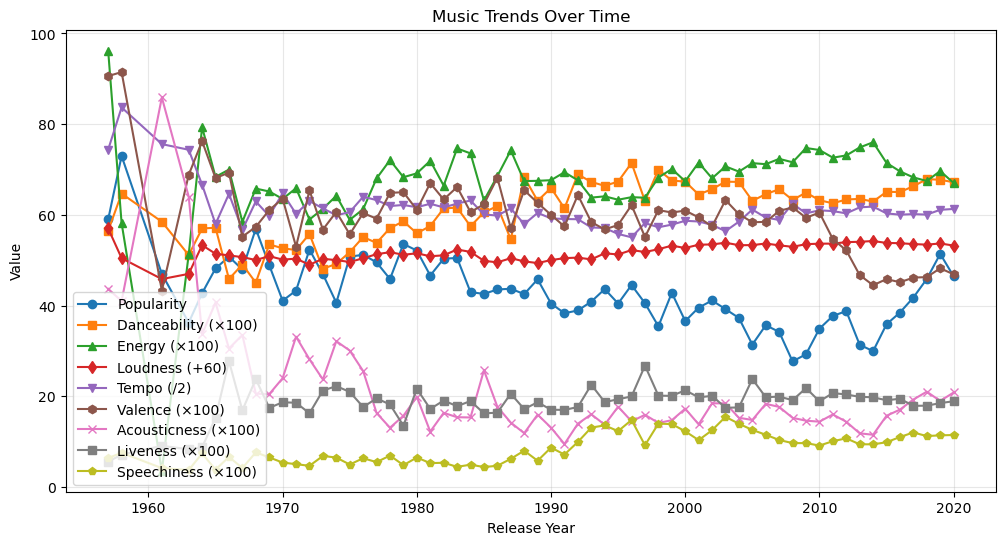

In [46]:
# Extract year from album_release_date
data['release_year'] = pd.to_datetime(data['album_release_date'], errors='coerce').dt.year

# Analyze trends over time
yearly_stats = data.groupby('release_year').agg({
    'popularity': 'mean',
    'danceability': 'mean',
    'energy': 'mean',
    'loudness': 'mean',
    'tempo': 'mean',
    'acousticness': 'mean',
    'liveness': 'mean',
    'valence': 'mean',
    'speechiness': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(yearly_stats['release_year'], yearly_stats['popularity'], marker='o', label='Popularity')
plt.plot(yearly_stats['release_year'], yearly_stats['danceability']*100, marker='s', label='Danceability (×100)')
plt.plot(yearly_stats['release_year'], yearly_stats['energy']*100, marker='^', label='Energy (×100)')
plt.plot(yearly_stats['release_year'], yearly_stats['loudness']+60, marker='d', label='Loudness (+60)')
plt.plot(yearly_stats['release_year'], yearly_stats['tempo']/2, marker='v', label='Tempo (/2)')
plt.plot(yearly_stats['release_year'], yearly_stats['valence']*100, marker='h', label='Valence (×100)')
plt.plot(yearly_stats['release_year'], yearly_stats['acousticness']*100, marker='x', label='Acousticness (×100)')
plt.plot(yearly_stats['release_year'], yearly_stats['liveness']*100, marker='s', label='Liveness (×100)')   
plt.plot(yearly_stats['release_year'], yearly_stats['speechiness']*100, marker='p', label='Speechiness (×100)')
plt.xlabel('Release Year')
plt.ylabel('Value')
plt.title('Music Trends Over Time')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

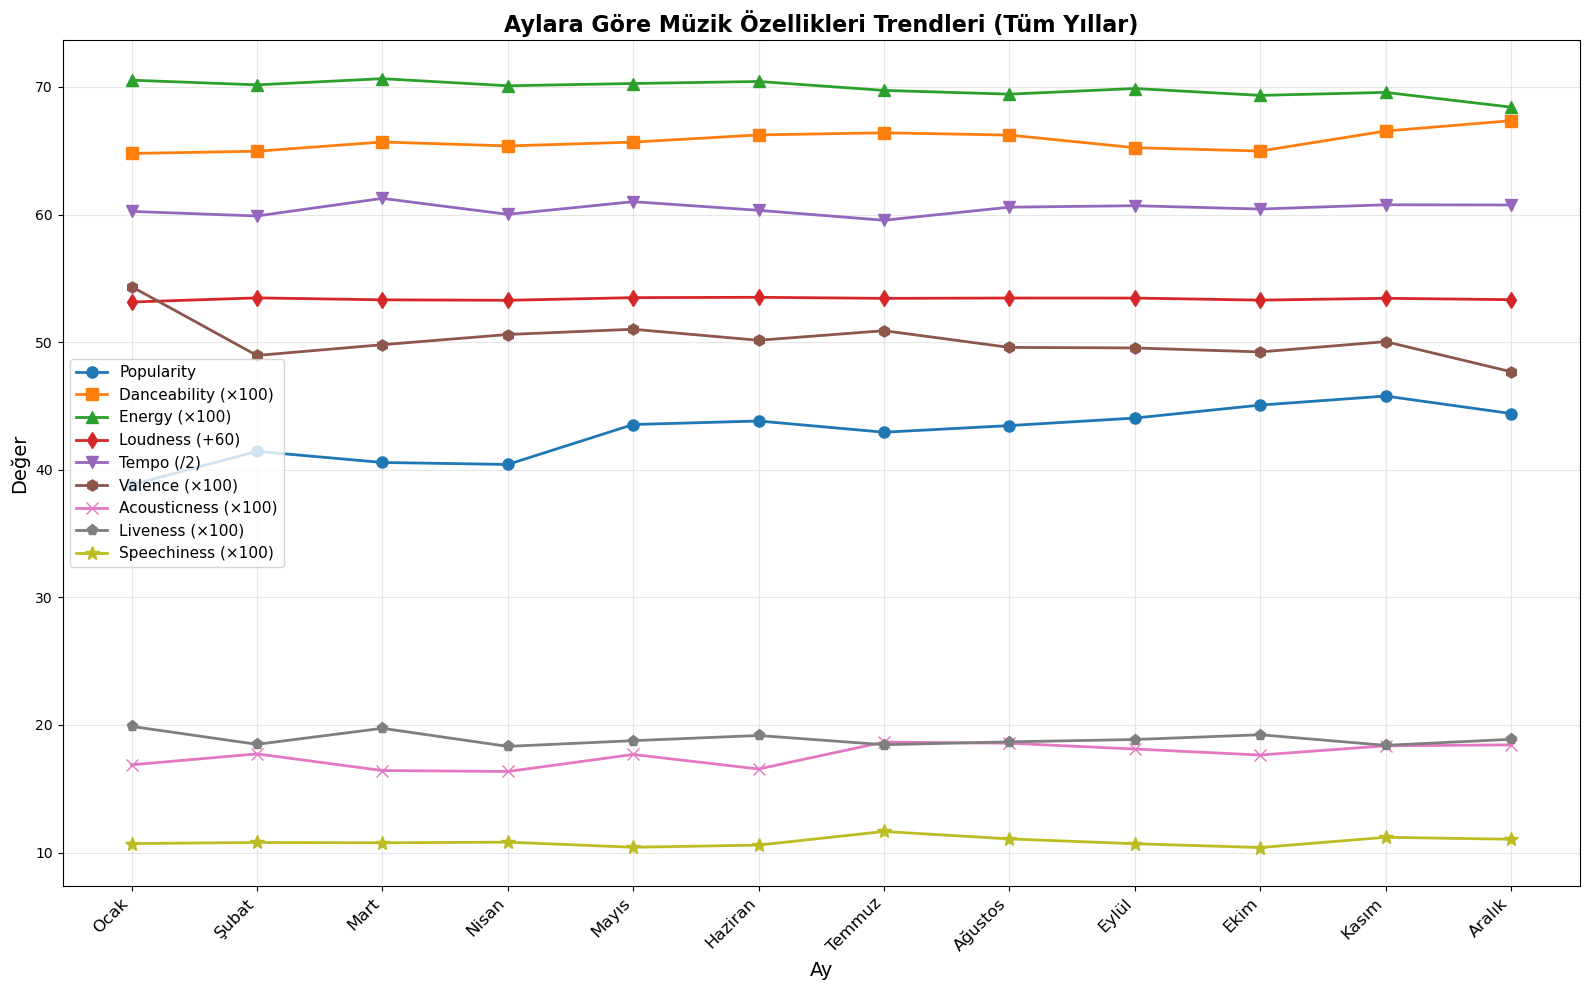


Aylara Göre Müzik Özellikleri:
month_name  popularity  danceability   energy  loudness      tempo  acousticness  liveness  valence  speechiness
      Ocak   38.815593      0.647841 0.705292 -6.857929 120.490980      0.168746  0.198874 0.543524     0.107043
     Şubat   41.439554      0.649614 0.701627 -6.532297 119.771330      0.177305  0.184800 0.489556     0.107877
      Mart   40.568374      0.656838 0.706457 -6.684679 122.527813      0.164267  0.197365 0.497974     0.107635
     Nisan   40.412105      0.653753 0.700900 -6.721506 120.028215      0.163504  0.183177 0.505974     0.108135
     Mayıs   43.542702      0.656733 0.702678 -6.513657 122.014473      0.176841  0.187671 0.510087     0.104115
   Haziran   43.818410      0.662380 0.704272 -6.486940 120.660507      0.165469  0.191726 0.501440     0.105826
    Temmuz   42.938776      0.664045 0.697270 -6.569734 119.101667      0.186565  0.184493 0.508967     0.116506
   Ağustos   43.459530      0.662258 0.694333 -6.544075 121.1510

In [47]:
# Tarih bilgisinden ay bilgisini çıkar
data['release_date'] = pd.to_datetime(data['album_release_date'], errors='coerce')
data['release_month'] = data['release_date'].dt.month

# Ay isimlerini tanımla
month_names = {
    1: 'Ocak', 2: 'Şubat', 3: 'Mart', 4: 'Nisan', 
    5: 'Mayıs', 6: 'Haziran', 7: 'Temmuz', 8: 'Ağustos',
    9: 'Eylül', 10: 'Ekim', 11: 'Kasım', 12: 'Aralık'
}

# Aylara göre tüm özelliklerin ortalamasını hesapla
monthly_stats = data.groupby('release_month').agg({
    'popularity': 'mean',
    'danceability': 'mean',
    'energy': 'mean',
    'loudness': 'mean',
    'tempo': 'mean',
    'acousticness': 'mean',
    'liveness': 'mean',
    'valence': 'mean',
    'speechiness': 'mean'
}).reset_index()

# Ay isimlerini ekle
monthly_stats['month_name'] = monthly_stats['release_month'].map(month_names)

# Görselleştirme
plt.figure(figsize=(16, 10))

plt.plot(monthly_stats['month_name'], monthly_stats['popularity'], marker='o', linewidth=2, markersize=8, label='Popularity')
plt.plot(monthly_stats['month_name'], monthly_stats['danceability']*100, marker='s', linewidth=2, markersize=8, label='Danceability (×100)')
plt.plot(monthly_stats['month_name'], monthly_stats['energy']*100, marker='^', linewidth=2, markersize=8, label='Energy (×100)')
plt.plot(monthly_stats['month_name'], monthly_stats['loudness']+60, marker='d', linewidth=2, markersize=8, label='Loudness (+60)')
plt.plot(monthly_stats['month_name'], monthly_stats['tempo']/2, marker='v', linewidth=2, markersize=8, label='Tempo (/2)')
plt.plot(monthly_stats['month_name'], monthly_stats['valence']*100, marker='h', linewidth=2, markersize=8, label='Valence (×100)')
plt.plot(monthly_stats['month_name'], monthly_stats['acousticness']*100, marker='x', linewidth=2, markersize=8, label='Acousticness (×100)')
plt.plot(monthly_stats['month_name'], monthly_stats['liveness']*100, marker='p', linewidth=2, markersize=8, label='Liveness (×100)')   
plt.plot(monthly_stats['month_name'], monthly_stats['speechiness']*100, marker='*', linewidth=2, markersize=10, label='Speechiness (×100)')

plt.xlabel('Ay', fontsize=14)
plt.ylabel('Değer', fontsize=14)
plt.title('Aylara Göre Müzik Özellikleri Trendleri (Tüm Yıllar)', fontsize=16, fontweight='bold')
plt.legend(loc='best', fontsize=11)
plt.grid(alpha=0.3)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

# Aylık istatistikleri tablo olarak göster
print("\nAylara Göre Müzik Özellikleri:")
print(monthly_stats[['month_name', 'popularity', 'danceability', 'energy', 'loudness', 
                     'tempo', 'acousticness', 'liveness', 'valence', 'speechiness']].to_string(index=False))

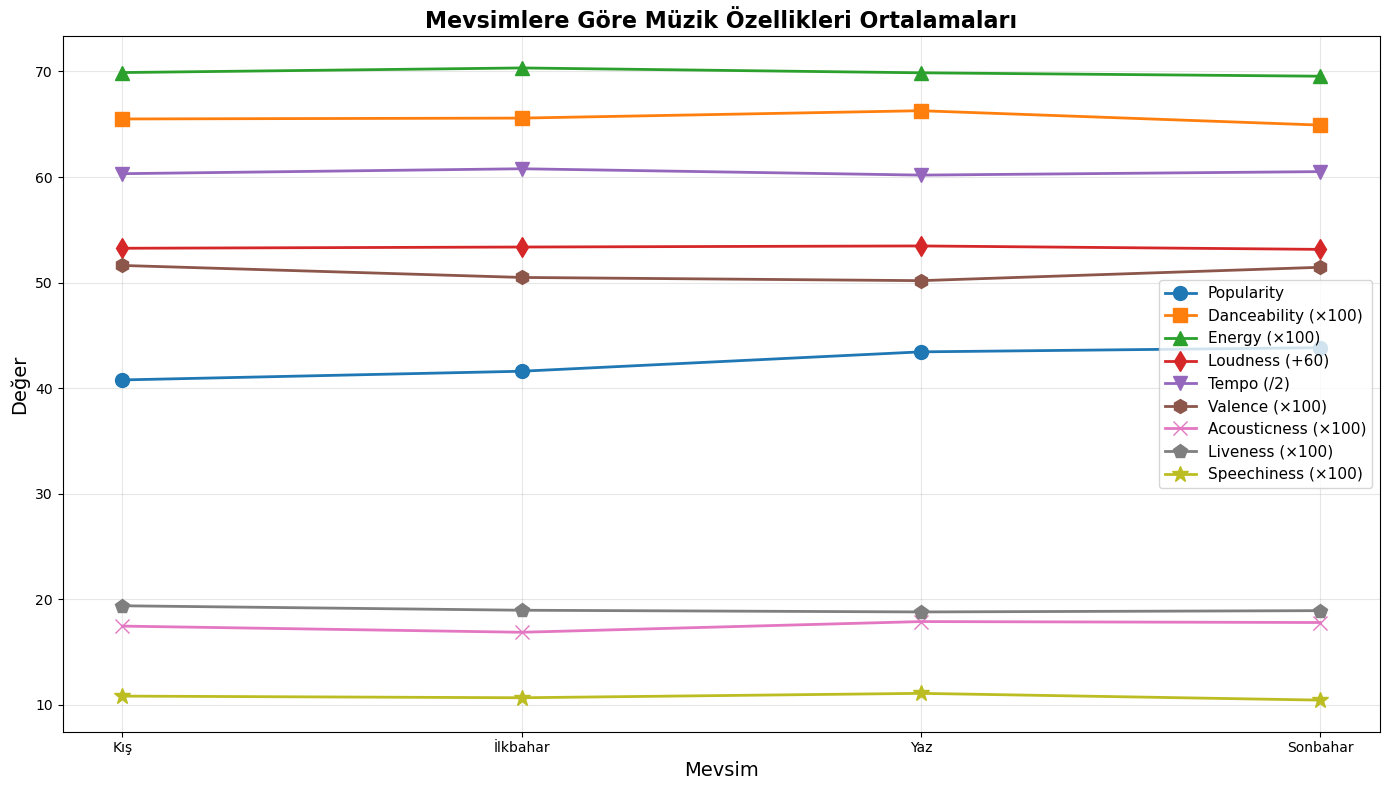


Mevsimlere Göre Müzik Özellikleri:
  season  popularity  danceability   energy  loudness      tempo  acousticness  liveness  valence  speechiness
     Kış   40.770685      0.655015 0.699001 -6.751146 120.632324      0.174425  0.193685 0.516190     0.108089
İlkbahar   41.594709      0.655843 0.703367 -6.634304 121.566798      0.168574  0.189460 0.504833     0.106518
     Yaz   43.431387      0.662838 0.698761 -6.531382 120.361199      0.178720  0.187844 0.501784     0.110694
Sonbahar   43.823345      0.649226 0.695533 -6.856848 121.024675      0.177823  0.189062 0.514460     0.104283

=== MEVSİMSEL ÖZET ===

Kış:
  Popularity: 40.77
  Danceability: 0.6550
  Energy: 0.6990
  Valence: 0.5162
  Tempo: 120.63

İlkbahar:
  Popularity: 41.59
  Danceability: 0.6558
  Energy: 0.7034
  Valence: 0.5048
  Tempo: 121.57

Yaz:
  Popularity: 43.43
  Danceability: 0.6628
  Energy: 0.6988
  Valence: 0.5018
  Tempo: 120.36

Sonbahar:
  Popularity: 43.82
  Danceability: 0.6492
  Energy: 0.6955
  Valence

In [ ]:
# Tarih bilgisinden ay bilgisini çıkar
data['release_date'] = pd.to_datetime(data['album_release_date'], errors='coerce')
data['release_month'] = data['release_date'].dt.month

# Mevsim tanımlama fonksiyonu
def get_season(month):
    if month in [12, 1, 2]:
        return 'Kış'
    elif month in [3, 4, 5]:
        return 'İlkbahar'
    elif month in [6, 7, 8]:
        return 'Yaz'
    else:  # 9, 10, 11
        return 'Sonbahar'

# Her şarkıya mevsim bilgisi ekle
data['season'] = data['release_month'].apply(get_season)

# Mevsimlere göre tüm özelliklerin ortalamasını hesapla
seasonal_stats = data.groupby('season').agg({
    'popularity': 'mean',
    'danceability': 'mean',
    'energy': 'mean',
    'loudness': 'mean',
    'tempo': 'mean',
    'acousticness': 'mean',
    'liveness': 'mean',
    'valence': 'mean',
    'speechiness': 'mean'
}).reset_index()

# Mevsimleri doğru sırayla düzenle
season_order = ['Kış', 'İlkbahar', 'Yaz', 'Sonbahar']
seasonal_stats['season'] = pd.Categorical(seasonal_stats['season'], categories=season_order, ordered=True)
seasonal_stats = seasonal_stats.sort_values('season')

# Görselleştirme
plt.figure(figsize=(14, 8))

plt.plot(seasonal_stats['season'], seasonal_stats['popularity'], marker='o', linewidth=2, markersize=10, label='Popularity')
plt.plot(seasonal_stats['season'], seasonal_stats['danceability']*100, marker='s', linewidth=2, markersize=10, label='Danceability (×100)')
plt.plot(seasonal_stats['season'], seasonal_stats['energy']*100, marker='^', linewidth=2, markersize=10, label='Energy (×100)')
plt.plot(seasonal_stats['season'], seasonal_stats['loudness']+60, marker='d', linewidth=2, markersize=10, label='Loudness (+60)')
plt.plot(seasonal_stats['season'], seasonal_stats['tempo']/2, marker='v', linewidth=2, markersize=10, label='Tempo (/2)')
plt.plot(seasonal_stats['season'], seasonal_stats['valence']*100, marker='h', linewidth=2, markersize=10, label='Valence (×100)')
plt.plot(seasonal_stats['season'], seasonal_stats['acousticness']*100, marker='x', linewidth=2, markersize=10, label='Acousticness (×100)')
plt.plot(seasonal_stats['season'], seasonal_stats['liveness']*100, marker='p', linewidth=2, markersize=10, label='Liveness (×100)')
plt.plot(seasonal_stats['season'], seasonal_stats['speechiness']*100, marker='*', linewidth=2, markersize=12, label='Speechiness (×100)')

plt.xlabel('Mevsim', fontsize=14)
plt.ylabel('Değer', fontsize=14)
plt.title('Mevsimlere Göre Müzik Özellikleri Ortalamaları', fontsize=16, fontweight='bold')
plt.legend(loc='best', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Mevsimsel istatistikleri tablo olarak göster
print("\nMevsimlere Göre Müzik Özellikleri:")
print(seasonal_stats[['season', 'popularity', 'danceability', 'energy', 'loudness', 
                      'tempo', 'acousticness', 'liveness', 'valence', 'speechiness']].to_string(index=False))
